In [1]:
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [21]:
emb_sizes = [1,2,4,6,8,10,12,14,16]
chromosomes = range(1, 23)

boxplot_palette = ['C4', 'C3', 'C2', 'C0', 'C1']

# N. features vs. accuracy embedding comparison

## Hadamard embedding

In [3]:
x_rf_n2v_had = []
y_rf_n2v_had = []
for emb_size in emb_sizes:
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_node2vec_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_nw10_wl80_p1.0_q1.0_hadamard.pkl'.format(chromosome, chromosome, chromosome, emb_size), 'rb') as file_load:
            results = pickle.load(file_load)
            y_rf_n2v_had.extend(results['acc'])
            x_rf_n2v_had.extend([emb_size]*len(results['acc']))
            
x_rf_svd_had = []
y_rf_svd_had = []
for emb_size in emb_sizes:
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_svd_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_hadamard.pkl'.format(chromosome, chromosome, chromosome, emb_size), 'rb') as file_load:
            results = pickle.load(file_load)
            y_rf_svd_had.extend(results['acc'])
            x_rf_svd_had.extend([emb_size]*len(results['acc']))

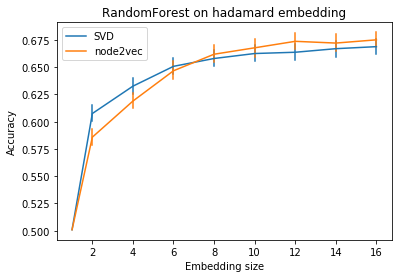

In [4]:
plt.xlabel('Embedding size')
plt.ylabel('Accuracy')
plt.title('RandomForest on hadamard embedding')

sns.lineplot(x=x_rf_svd_had, y=y_rf_svd_had, err_style='bars')
sns.lineplot(x=x_rf_n2v_had, y=y_rf_n2v_had, err_style='bars')
plt.legend(['SVD', 'node2vec'])

## Concatenation embedding

In [5]:
x_rf_n2v_cat = []
y_rf_n2v_cat = []
for emb_size in emb_sizes:
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_node2vec_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_nw10_wl80_p1.0_q1.0_concat.pkl'.format(chromosome, chromosome, chromosome, emb_size), 'rb') as file_load:
            results = pickle.load(file_load)
            y_rf_n2v_cat.extend(results['acc'])
            x_rf_n2v_cat.extend([emb_size]*len(results['acc']))
            
x_rf_svd_cat = []
y_rf_svd_cat = []
for emb_size in emb_sizes:
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_svd_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_concat.pkl'.format(chromosome, chromosome, chromosome, emb_size), 'rb') as file_load:
            results = pickle.load(file_load)
            y_rf_svd_cat.extend(results['acc'])
            x_rf_svd_cat.extend([emb_size]*len(results['acc']))

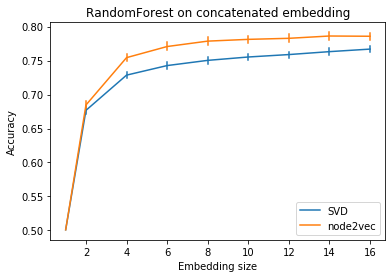

In [22]:
plt.xlabel('Embedding size')
plt.ylabel('Accuracy')
plt.title('RandomForest on concatenated embedding')

sns.lineplot(x=x_rf_svd_cat, y=y_rf_svd_cat, err_style='bars')
sns.lineplot(x=x_rf_n2v_cat, y=y_rf_n2v_cat, err_style='bars')
plt.legend(['SVD', 'node2vec'])

# Performance with Random Forest

In [7]:
from IPython.display import Image 

## MCF7

### Hadamard Embedding MCF7 - Embedding size 16

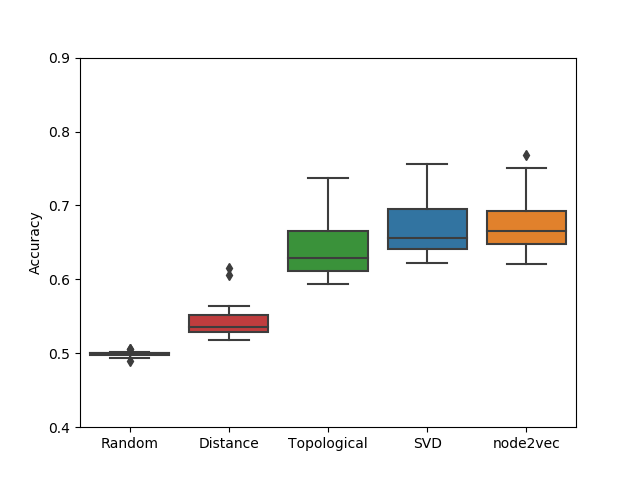

In [23]:
pil_img = Image(filename='plots/MCF7/acc_chr_all_Random_Distance_had_Topological_avg_sub_SVD_had_node2vec_had.png')
display(pil_img)

### Concatenation embedding MCF7 - Embedding size 8

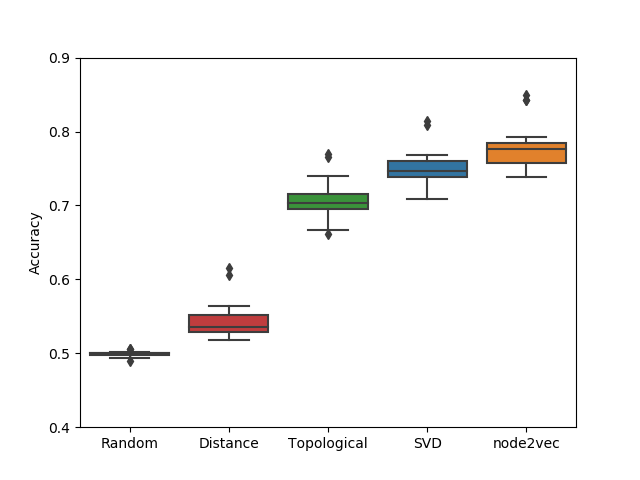

In [24]:
pil_img = Image(filename='plots/MCF7/acc_chr_all_Random_Distance_had_Topological_cat_SVD_cat_node2vec_cat.png')
display(pil_img)

## PRAD

### Hadamard Embedding PRAD - Embedding size 16

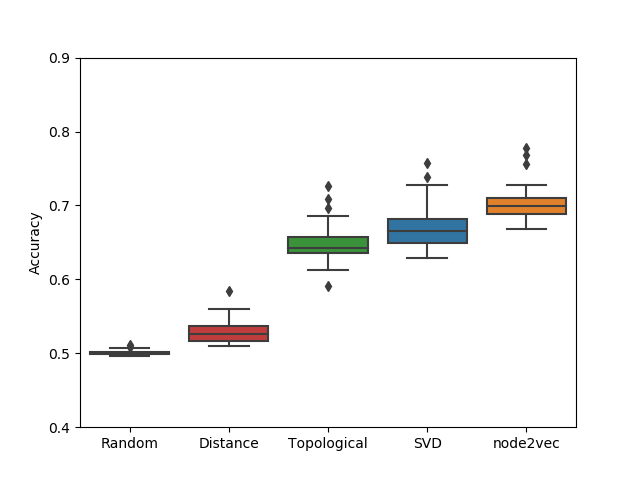

In [27]:
pil_img = Image(filename='plots/PRAD/acc_chr_all_Random_Distance_had_Topological_had_SVD_had_node2vec_had.png')
display(pil_img)

### Concatenation embedding PRAD - Embedding size 8

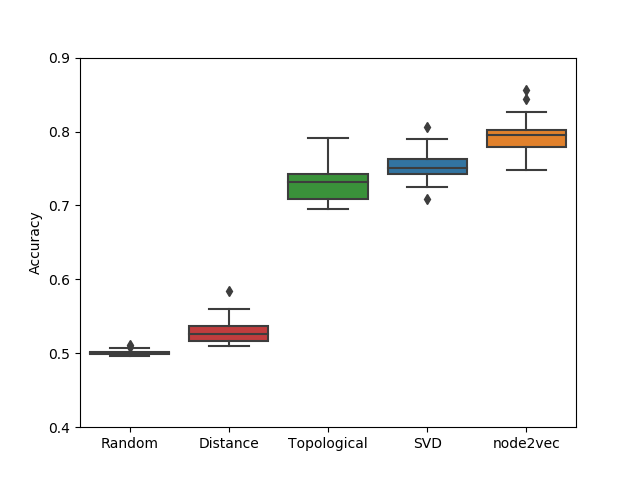

In [25]:
pil_img = Image(filename='plots/PRAD/acc_chr_all_Random_Distance_had_Topological_cat_SVD_cat_node2vec_cat.png')
display(pil_img)

# Embedding aggregation

Hadamard, average, sub and l2 use node embeddings of size 16 -> edge embedding of size 16 <br>
Concatenation uses node embeddings of size 8 -> edge embedding of size 16

## MCF7 node2vec Random Forest

In [81]:
import pandas as pd
method_sizes = {'hadamard': 16, 'avg': 16, 'sub': 16, 'l2': 16, 'concat': 8}

([<matplotlib.axis.XTick at 0x7fb4afcb6b38>,
 <a list of 5 Text xticklabel objects>)

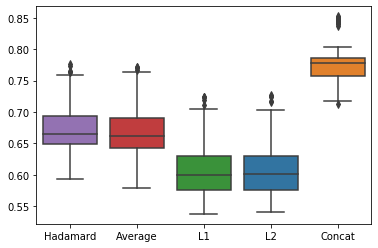

In [82]:
scores =[]
for method in method_sizes.keys():
    y = []
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_node2vec_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_nw10_wl80_p1.0_q1.0_{}.pkl'.format(chromosome, chromosome, chromosome, method_sizes[method], method), 'rb') as file_load:
            results = pickle.load(file_load)
            y.extend(results['acc'])
    scores.append(y)
sns.boxplot(data=pd.DataFrame(scores).T, palette=boxplot_palette)
plt.xticks(np.arange(5),['Hadamard', 'Average', 'L1', 'L2', 'Concat'])


([<matplotlib.axis.XTick at 0x7fb4afbecba8>,
 <a list of 10 Text xticklabel objects>)

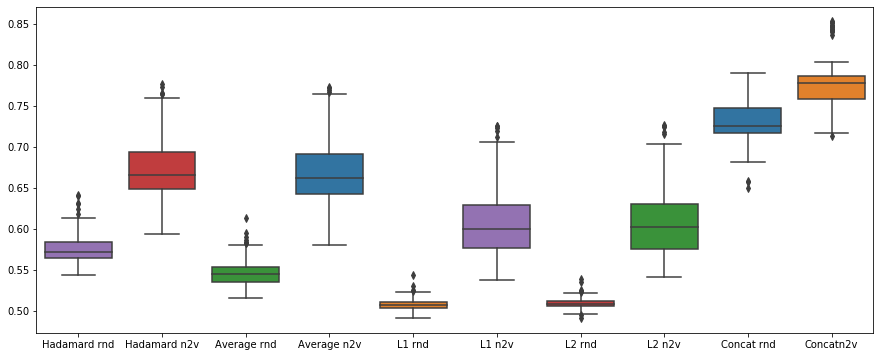

In [83]:
scores =[]
for method in method_sizes.keys():
    y = []
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_random_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_{}.pkl'.format(chromosome, chromosome, chromosome, method_sizes[method], method), 'rb') as file_load:
            results = pickle.load(file_load)
            y.extend(results['acc'])
    scores.append(y)
    y = []
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_node2vec_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_nw10_wl80_p1.0_q1.0_{}.pkl'.format(chromosome, chromosome, chromosome, method_sizes[method], method), 'rb') as file_load:
            results = pickle.load(file_load)
            y.extend(results['acc'])
    scores.append(y)
plt.figure(figsize=(15,6))
sns.boxplot(data=pd.DataFrame(scores).T, palette=boxplot_palette)
plt.xticks(np.arange(10),['Hadamard rnd', 'Hadamard n2v', 'Average rnd', 'Average n2v', 'L1 rnd',  'L1 n2v', 'L2 rnd', 'L2 n2v', 'Concat rnd', 'Concat n2v'])

Makarov et al. (2018b) introduced two new node embedding combination methods, the Neighbor L1 and Neighbor L2.<br>
In these methods the embedding of a node is first averaged with the embeddings of all its neighbors before applying the operator and it showed improved performances.<br>
We applied these modification not only to the L1 and L2 operators but also to the average and adamard operators.

In [84]:
method_sizes = {'hadamard': 16, 'nwhad':16, 'avg': 16, 'nwavg':16,  'sub': 16, 'nwl1':16, 'l2': 16, 'nwl2':16, 'concat': 8}

([<matplotlib.axis.XTick at 0x7fb4afb02320>,
 <a list of 9 Text xticklabel objects>)

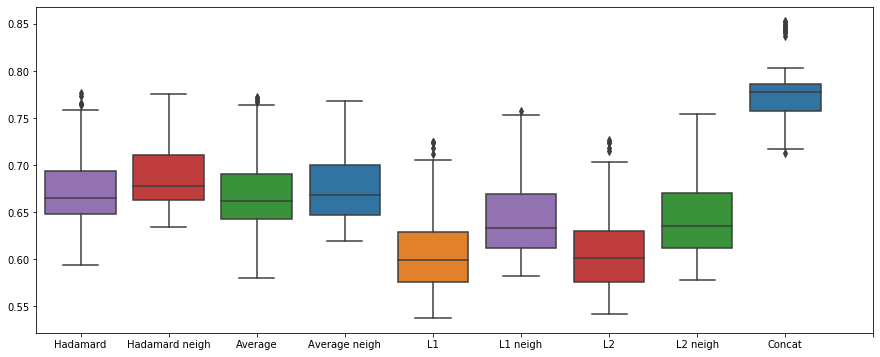

In [85]:
scores =[]
for method in method_sizes.keys():
    y = []
    for chromosome in chromosomes:
        with open('results/MCF7/chr_{:02d}/rf_node2vec_primary_observed_KR_{}_{}_50000_50000_0.9073_es{}_nw10_wl80_p1.0_q1.0_{}.pkl'.format(chromosome, chromosome, chromosome, method_sizes[method], method), 'rb') as file_load:
            results = pickle.load(file_load)
            y.extend(results['acc'])
    scores.append(y)
plt.figure(figsize=(15,6))
sns.boxplot(data=pd.DataFrame(scores).T, palette=boxplot_palette)
plt.xticks(np.arange(10),['Hadamard', 'Hadamard neigh', 'Average', 'Average neigh', 'L1',  'L1 neigh', 'L2', 'L2 neigh', 'Concat'])